# XGBoost Classification with Python

library imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import xgboost as xgb

In [5]:
from xgboost import XGBClassifier

## The Data

Let's start by reading in the Churn-Modelling.csv file into a pandas dataframe.

In [7]:
train = pd.read_csv('Churn_Modelling.csv')

In [8]:
train.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [9]:
Male=pd.get_dummies(train['Gender'],drop_first=True)

In [10]:
Country=pd.get_dummies(train['Geography'],drop_first=True)

In [11]:
train.drop(['RowNumber','CustomerId','Surname','Geography', 'Gender'],axis=1,inplace=True)

In [12]:
train = pd.concat([train,Male,Country],axis=1)

In [13]:
train.insert(0,'const',1)

In [14]:
train.head()

,const,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
0,1,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,1,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,1,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,1,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [15]:
train.describe()

,const,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,Germany,Spain
count,10000.0,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.0,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.545700,0.250900,0.247700
std,0.0,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.497932,0.433553,0.431698
min,1.0,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000,0.000000
25%,1.0,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000,0.000000
50%,1.0,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,1.000000,0.000000,0.000000
75%,1.0,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000,0.000000
max,1.0,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,1.000000,1.000000


# Data Visualization

In [16]:
view=train[['CreditScore','Age','Balance','EstimatedSalary','Male']]
view.head()

,CreditScore,Age,Balance,EstimatedSalary,Male
0,619,42,0.00,101348.88,0
1,608,41,83807.86,112542.58,0
2,502,42,159660.80,113931.57,0
3,699,39,0.00,93826.63,0
4,850,43,125510.82,79084.10,0


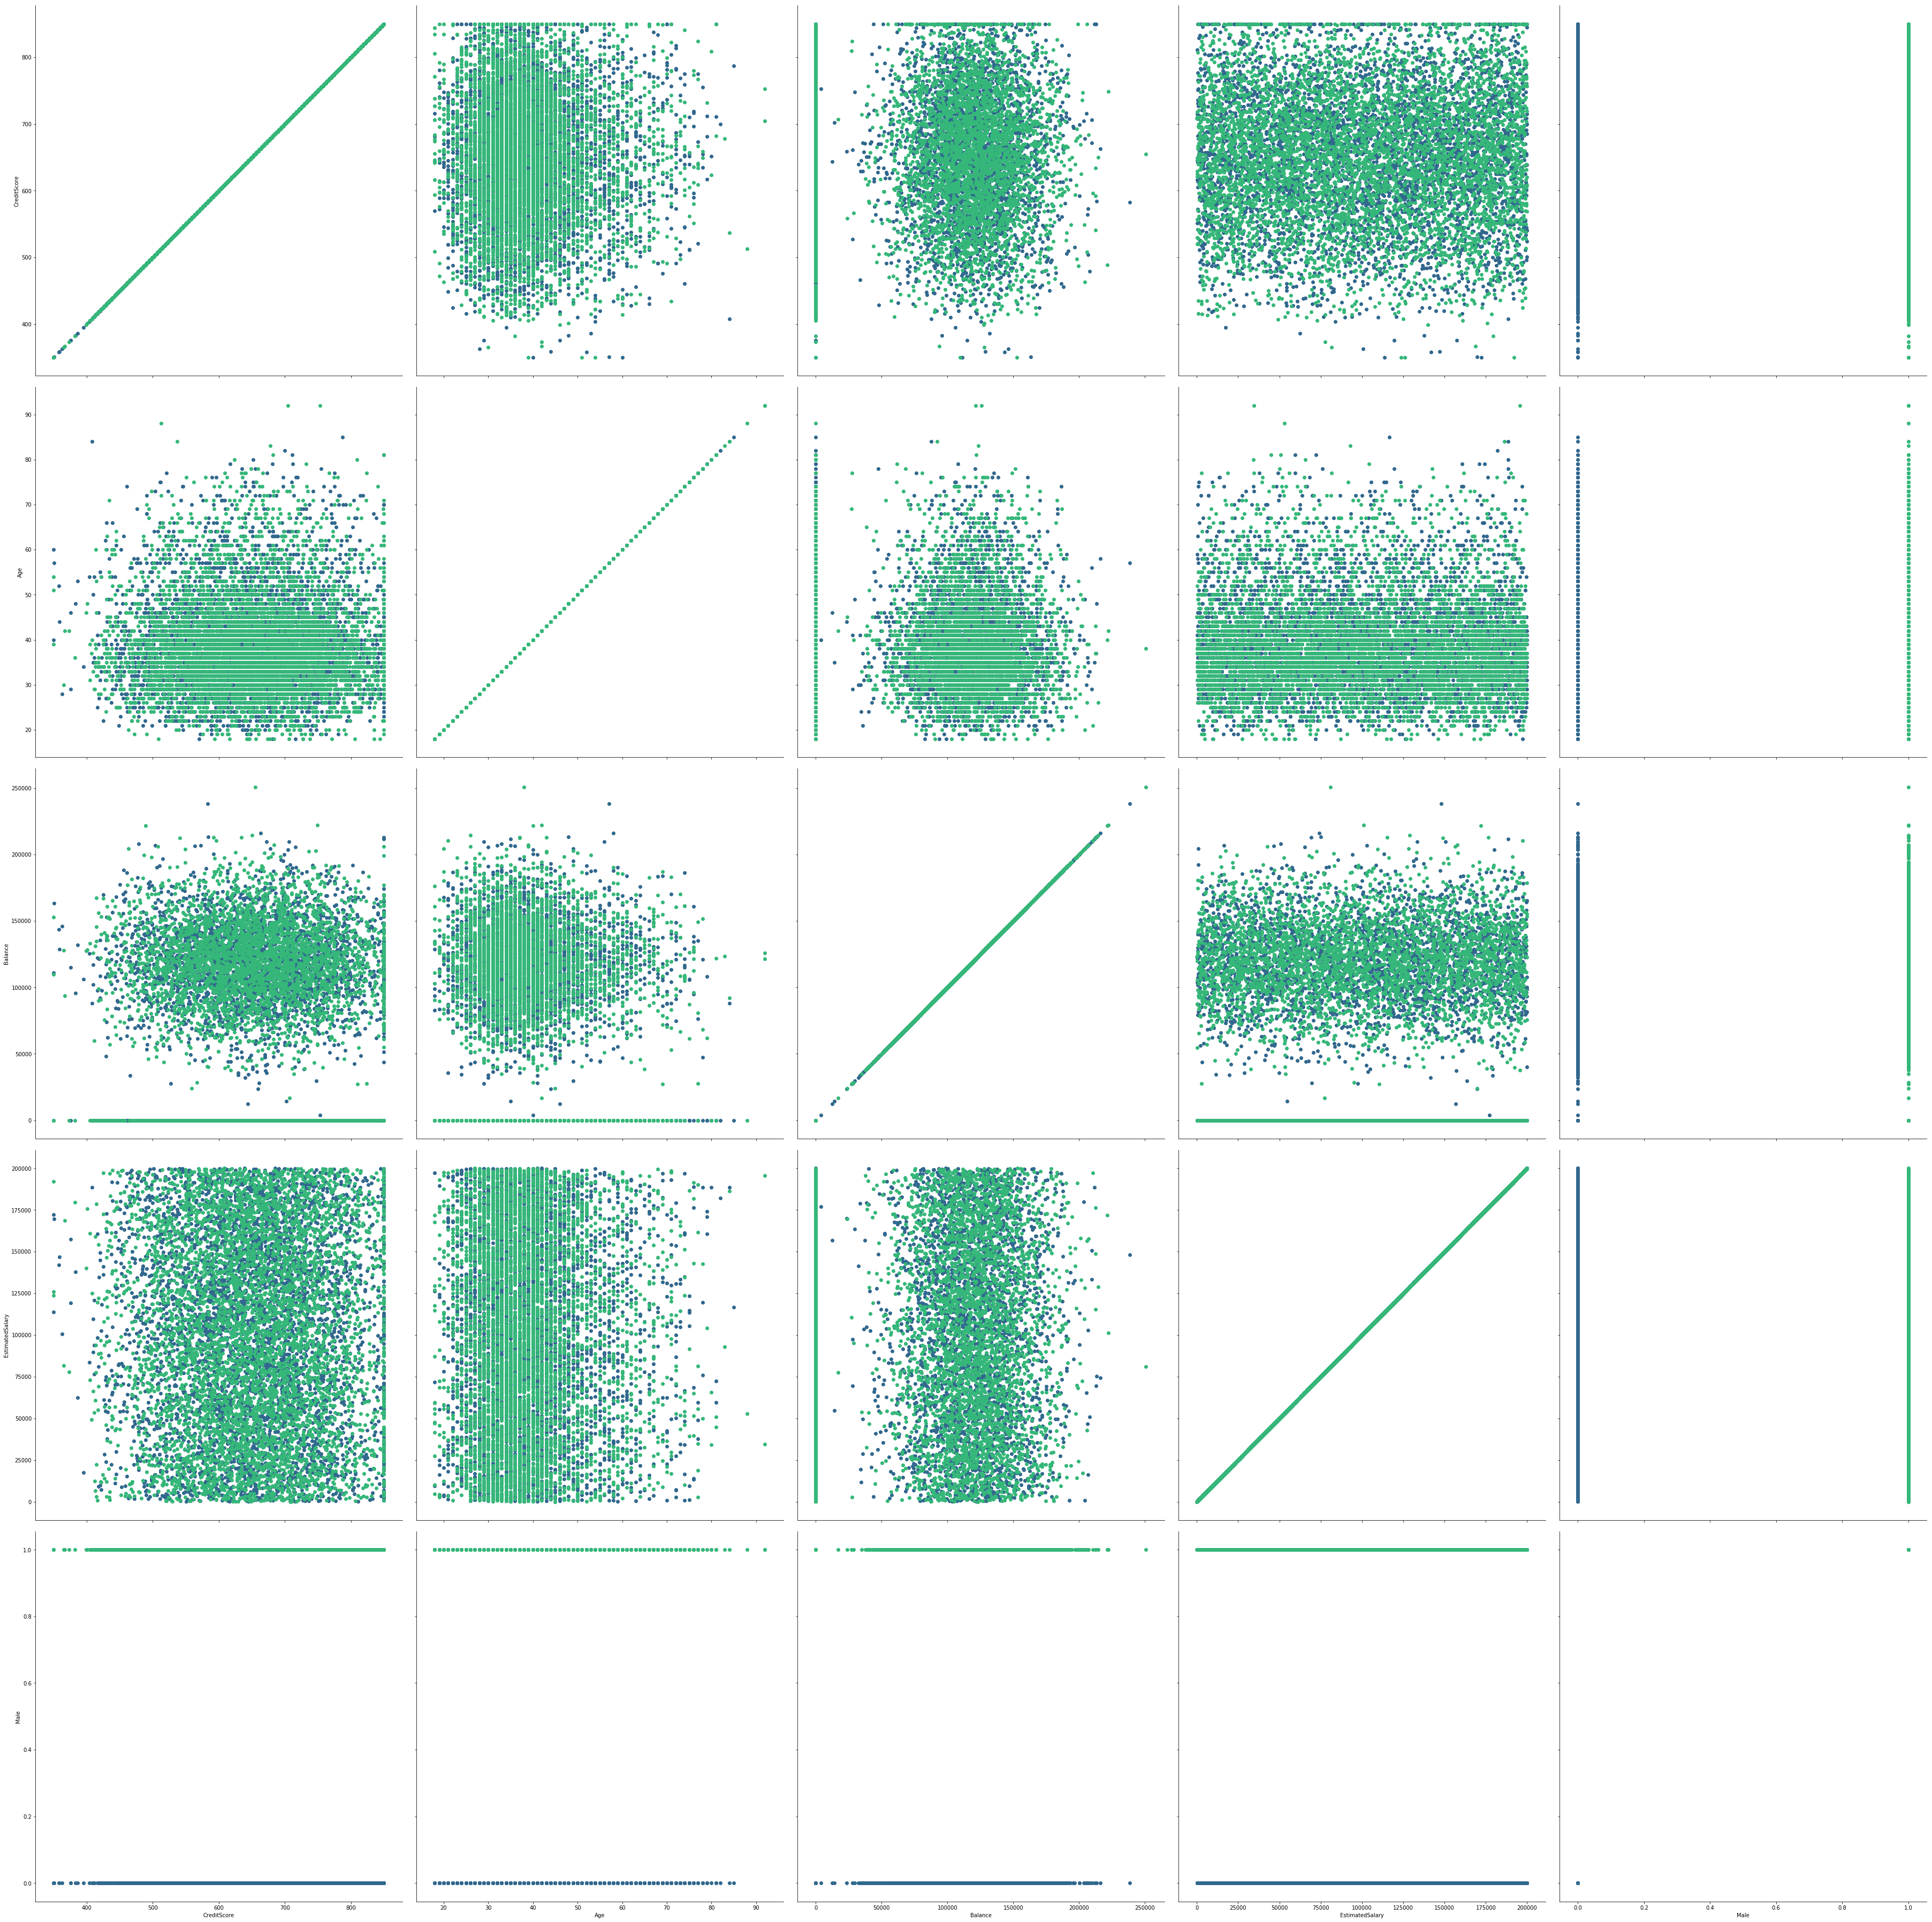

In [17]:
sns.PairGrid(view, hue= 'Male', palette='viridis', size= 10).map(plt.scatter)

Great! Our data is ready for our model!

# Building an XGBoosted Classification model

Let's start by splitting our data into a training set and test set.

## Train Test Split

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Exited',axis=1), train['Exited'], test_size=0.20, random_state=101)

## Training and Predicting

In [20]:
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [21]:
predictions = classifier.predict(X_test)

Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.88      0.96      0.92      1577
          1       0.79      0.50      0.61       423

avg / total       0.86      0.87      0.85      2000



In [24]:
print(confusion_matrix(y_test,predictions))

[[1521   56]
 [ 213  210]]


# K-Folds Cross Validation

In [25]:
from sklearn.model_selection import cross_val_score

In [26]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)

In [27]:
accuracies

array([ 0.87141074,  0.84394507,  0.87141074,  0.85393258,  0.87875   ,
        0.865     ,  0.86483104,  0.85481852,  0.87609512,  0.85607009])

In [29]:
accuracies.mean()

0.86362638945529591

In [28]:
accuracies.std()

0.010605297589072891

# Conclusion 
Backward elimination logistic regression model had an accuracy of 79.4% 
An Artificial Neural Network (ANN) was tuned to 85.3% accuracy and 500 epochs which was computationally very intensive.

XGBoosting has an accuracy of 86.3% and a standard deviation of 1% which is more accurate than the ANN and solved signifacantly quicker.  